In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.decomposition import PCA


def apply_feature_extraction(Xtrain, Xtest):
    model = PCA(n_components=0.99)
    print(model.n_components)
    Xtrain_transformed = model.fit_transform(Xtrain)
    Xtest_transformed = model.transform(Xtest)
    print(f"Reduced number of features: {Xtrain_transformed.shape[1]}")
    return Xtrain_transformed, Xtest_transformed


X_train = np.load('data/x_train.npy')
y_train = np.load('data/y_train.npy')

X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')

estimators = np.linspace(100, 1600, 6)
accuracy = []
accuracy_best = 0
n_estimators_best = 0
cm_best = 0
for n in range(len(estimators)):
    rfc = RandomForestClassifier(random_state=0, n_estimators=int(estimators[n]), criterion='gini')
    rfc = rfc.fit(X_train, y_train)

    y_pred = rfc.predict(X_test)

    score_r = rfc.score(X_test, y_test)
    accuracy.append(score_r)
    cm = confusion_matrix(y_test, y_pred)
    print("Number of estimators: \n", int(estimators[n]))
    print("Random Forest Accuracy: {}".format(score_r))
    print(classification_report(y_test, y_pred))
    print(cm)
    if score_r > accuracy_best:
        n_estimators_best = int(estimators[n])
        accuracy_best = score_r
        cm_best = cm

Number of estimators: 
 100
Random Forest Accuracy: 0.9673469387755103
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.97      0.99        36
           2       0.96      1.00      0.98        53
           3       0.94      0.96      0.95        50
           4       0.94      0.90      0.92        52

    accuracy                           0.97       245
   macro avg       0.97      0.97      0.97       245
weighted avg       0.97      0.97      0.97       245

[[54  0  0  0  0]
 [ 0 35  0  0  1]
 [ 0  0 53  0  0]
 [ 0  0  0 48  2]
 [ 0  0  2  3 47]]
Number of estimators: 
 400
Random Forest Accuracy: 0.9714285714285714
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      0.97      0.99        36
           2       0.96      1.00      0.98        53
           3       0.94      0.96      0.95        50
       

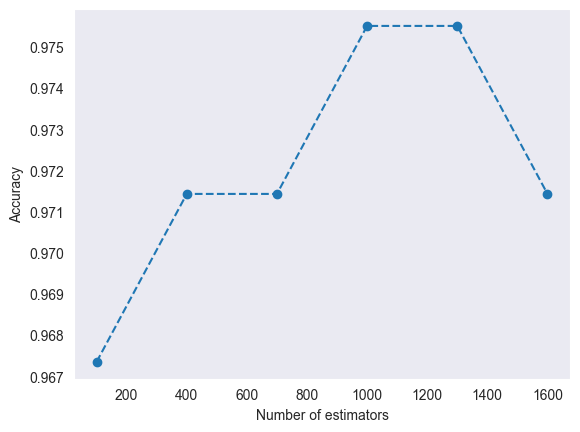

Best accuracy:0.9755102040816327 with 1000 estimators


In [29]:
plt.figure()
plt.plot(estimators, accuracy, linestyle='--', marker='o')
plt.grid()
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()
print('Best accuracy:' + str(accuracy_best) + ' with ' + str(n_estimators_best) +' estimators')

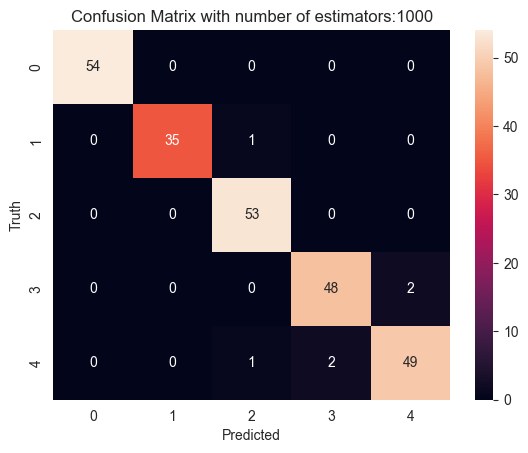

In [30]:
plt.figure()
sns.heatmap(cm_best, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix with number of estimators:' + str(n_estimators_best))
# plt.legend(possible_status)
plt.show()